Sparce matrix
zero eigenvalues = 0.0
corresponding eigenvectors:
[]
signal eigenvalues:
[3.38683523e+04 3.44195807e+04 4.07125539e+04 6.41620363e+04
 8.12652264e+04 1.20778461e+05 1.45974565e+05 6.68425376e+05
 4.82197465e+07]
corresponding eigenvectors:
[[ 0.02840789 -0.04441562  0.02059588 ...  0.03361502 -0.02658872
   0.03183062]
 [-0.05190863 -0.0085734  -0.03135332 ... -0.0131982   0.0179666
   0.03929171]
 [-0.00450257 -0.00482625  0.00417886 ...  0.01682627  0.0213309
   0.03021528]
 ...
 [ 0.00933186  0.0126852  -0.03378836 ...  0.05637754  0.01306952
   0.04746181]
 [ 0.09734067 -0.01538722 -0.03557387 ... -0.19991361 -0.04424387
   0.05397803]
 [ 0.00576844 -0.01653875 -0.02481604 ...  0.00787767  0.03633184
   0.04466344]]
guess rank = 9.0


/var/folders/hh/nh2dbgg13m91wbj__m66m8gr0000gn/T/ipykernel_87571/2850850369.py:87: RuntimeWarning: invalid value encountered in sqrt
  yy = np.sqrt((lmax - xx) * (xx - lmin)) / (2 * np.pi * r * xx)
/var/folders/hh/nh2dbgg13m91wbj__m66m8gr0000gn/T/ipykernel_87571/2850850369.py:87: RuntimeWarning: invalid value encountered in divide
  yy = np.sqrt((lmax - xx) * (xx - lmin)) / (2 * np.pi * r * xx)


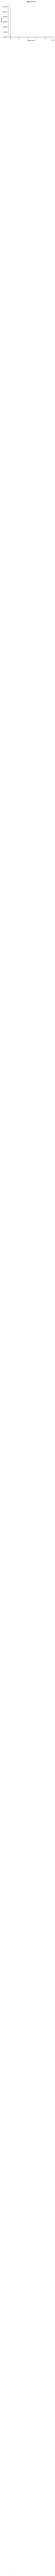

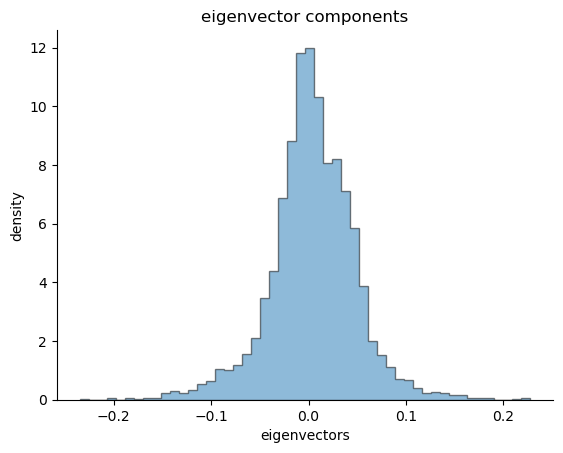

signal =
[[-1.89636179e-04  4.46143900e-05 -5.44968497e-05 ... -2.09550579e-04
  -2.23568999e-04  3.81574354e-05]
 [-1.57523439e-04  6.71964764e-05  2.42169464e-04 ... -6.88015506e-05
  -2.24580811e-04  8.07769582e-05]
 [-1.74444519e-04  5.84969707e-05 -2.59400007e-05 ...  1.65253049e-04
  -2.23013214e-04  5.00562197e-06]
 ...
 [ 5.34172629e-05  9.39703485e-06  1.60069682e-04 ... -2.24614976e-05
  -1.12548093e-04  6.73460694e-06]
 [ 1.23255434e-04  1.55066129e-04 -3.83476789e-04 ... -4.36181347e-05
  -1.97948914e-04  7.64462212e-05]
 [-1.83595895e-04 -2.52239083e-05 -1.38854645e-04 ...  1.56333933e-04
  -5.38261374e-05  5.84183009e-06]]
signal retrieved
[[ 50821.308  59912.49   46071.384 ...  72615.992  82708.206  67860.44 ]
 [ 59912.49   76582.912  57399.51  ...  89610.212 101848.76   85323.924]
 [ 46071.384  57399.51   45679.08  ...  69640.058  77361.016  65624.438]
 ...
 [ 72615.992  89610.212  69640.058 ... 112330.818 121821.086 102511.42 ]
 [ 82708.206 101848.76   77361.016 ... 12

In [8]:
#noiseless
    #recover rank n subspace
    #guess n
#sparcity
    #recover rank 1
    #guess n
    #error corrections
#matrix is too big
    #linear sketching
    #random projection
    #averaging
#start drafting

import numpy as np
import scipy as sp
from scipy import linalg
from matplotlib import pyplot as plt 
from tempfile import TemporaryFile

f = open("matrix.mtx", "r")
Data = sp.io.mmread(f)
prot = np.random.choice(2, (500, Data.shape[0]),p=[0.95,0.05])
r = int(Data.shape[1]/Data.shape[0])
n = 500
a = 1
rank = 2
N = rank
mu, sigma = 0, 1
lmax = (1 + np.sqrt(r)) ** 2
lmin = (1 - np.sqrt(r)) ** 2
signal = np.random.randint(-10,10,(int(n * r),rank))
Q = signal @ signal.T
origin = np.array([[0, 0],[0, 0]]) # origin point
proj = np.random.choice(2, (int(n * r/a),int(n*r)),p=[0.95,0.05])
prog = proj

def denoise(matrix):
    nrows = matrix.shape[0]
    ncols = matrix.shape[1]
    matrix = matrix / (nrows*ncols)
    matrix = matrix * 1e6
    matrix[:,:] = np.log2(np.abs(matrix[:,:]+1))
    for i in range(0, matrix.shape[1]-1):
        matrix[:,i] = (matrix[:,i] - np.mean(matrix[:,i].all()))*sigma/np.std(matrix[:,i])

def dataset():
    G = prot @ Data
    denoise(G)
    matrix = G @ G.T / n
    return matrix

def eigenm(matrix):
    eigs, eivecs = np.linalg.eigh(matrix)
    count = 0
    for j in range(0,matrix.shape[0]-1):
        if eigs[j] == 0:
            count = count + 1
    x = eigs[np.abs(eigs) > 2e4]
    vecs = eivecs[:, np.arange(prot.shape[0] - x.shape[0],prot.shape[0],1)]
    print('Sparce matrix')
    print('zero eigenvalues = %0.1f' % count)
    print('corresponding eigenvectors:')
    print(eivecs[:,np.arange(0,count-1,1)])
    print('signal eigenvalues:')
    print(x)
    print('corresponding eigenvectors:')
    print(vecs)
    guess = x.shape[0]
    print ('guess rank = %0.1f' % guess)

    if rank == 1:
        plt.quiver(*origin, 500*vecs[:,x.shape[0]-1][0], 500*vecs[:,x.shape[0]-1][1], lw =0.5, alpha=0.1, color="orange", scale=0.5)
        plt.ylim(-1,1)
        plt.show()

    plt.title("eigenvalues")
    eigs = eigs[np.abs(eigs) > lmax]
    plt.hist(eigs, density=True, histtype='stepfilled', alpha=0.5, bins=int(1e6), ec="k")
    plt.xlabel("eigenvalues")
    plt.ylabel("density")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)


    xx = np.linspace(lmin, eigs[x.shape[0]-1], x.shape[0])
    if r <= 1:  
        yy = np.sqrt((lmax - xx) * (xx - lmin)) / (2 * np.pi * r * xx)
        plt.plot(xx, yy, lw=4, alpha=0.7, color="orange")
        plt.text(0.95 * lmin, -0.1 * lmax, r"$\lambda^-$", color="teal")
        plt.text(0.95 * lmax, -0.1 * lmax, r"$\lambda^+$", color="#E78AC3")

    else: 
        yy = (1-1/r) + np.sqrt((lmax - xx) * (xx - lmin)) / (2 * np.pi * r * xx) #not able to input dirac-delta and obtain convergence

    plt.show()

    eivects = np.reshape(vecs,(vecs.shape[0]*vecs.shape[1],1),order='C')
    eivects = eivects[np.abs(eivects) > 1e-5]
    plt.title("eigenvector components")
    plt.hist(eivects, density=True, histtype='stepfilled', alpha=0.5, bins=int(n/10), ec="k")
    plt.xlabel("eigenvectors")
    plt.ylabel("density")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    xx = np.linspace(-1, 1, 1000)
    plt.show()
    
    print("signal =")
    sigguess = prot.T @ np.linalg.inv(prot @ prot.T) @ vecs
    print(sigguess)

    if sigguess.shape[0] == Data.shape[0]:
        print("signal retrieved")
    else:
        print("signal unretrieved")

    sp.io.mmwrite('signal.mtx', sigguess)

def sketch():
    matrix = dataset()
    # eigen(matrix)
    return matrix

T1 = sketch()
T2 = sketch()
T3 = sketch()
T4 = sketch()
T5 = sketch()
T6 = sketch()
T7 = sketch()
T8 = sketch()
T9 = sketch()
T10 = sketch()
Tm = np.zeros((T10.shape[0], T10.shape[1]))
for j in range(0,int(T10.shape[0])):
    Tm[:,j] = (T1[:,j]+T2[:,j]+T3[:,j]+T4[:,j]+T5[:,j]+T6[:,j]+T7[:,j]+T8[:,j]+T9[:,j]+T10[:,j])/10

eigenm(Tm)
print(Tm)